In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
df_train= pd.read_excel('Final_Train.xlsx')

# reading test data from csv file
df_test= pd.read_excel('Final_Test.xlsx')

# sample of train data
print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300


In [3]:
# sample of test data
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"


###### Performing EDA

In [4]:
# checking shape of train and test data
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',df_train.shape)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',df_test.shape)

Train data shape (5961, 7)
Test data shape (1987, 6)


In [5]:
# checking data type of train and test data
print('\x1b[1;31m'+'Data type of train data set\n\n'+'\x1b[0m',df_train.dtypes,'\n\n')
print('\x1b[1;31m'+'Data type of test data set\n'+'\x1b[0m',df_test.dtypes)

Data type of train data set

 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object 


Data type of test data set
 Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object


In [6]:
#checking unique values in train and test data
print('\x1b[1;31m'+'Unique value in train data set\n\n'+'\x1b[0m',df_train.nunique(),'\n\n')
print('\x1b[1;31m'+'Unique value in test data set\n'+'\x1b[0m',df_test.nunique())

Unique value in train data set

 Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64 


Unique value in test data set
 Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64


In [7]:
# checking null value in train and test data
print('\x1b[1;31m'+'Null value in train data set\n\n'+'\x1b[0m',df_train.isnull().sum(),'\n\n')
print('\x1b[1;31m'+'Null value in test data set\n'+'\x1b[0m',df_test.isnull().sum())

Null value in train data set

 Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64 


Null value in test data set
 Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [8]:
# splitting the Place into two diff columns

df_train['City'] = df_train['Place'].str.split(',').str[1]
df_train['Locality'] = df_train['Place'].str.split(',').str[0]


df_test['City'] = df_test['Place'].str.split(',').str[1]
df_test['Locality'] = df_test['Place'].str.split(',').str[0]

# replacing null values in the new columns with 'others'
df_train['City'].fillna("others",inplace = True)
df_train['Locality'].fillna("others",inplace = True)

df_test['City'].fillna("others",inplace = True)
df_test['Locality'].fillna("others",inplace = True)

# droping Place column
df_train=df_train.drop(columns=['Place'])
df_test=df_test.drop(columns=['Place'])

In [9]:
# splitting qualification into diff columns
df_train['Qualification_1'] = df_train['Qualification'].str.split(',').str[0]
df_train['Qualification_2'] = df_train['Qualification'].str.split(',').str[1]
df_train['Qualification_3'] = df_train['Qualification'].str.split(',').str[2]

df_test['Qualification_1'] = df_test['Qualification'].str.split(',').str[0]
df_test['Qualification_2'] = df_test['Qualification'].str.split(',').str[1]
df_test['Qualification_3'] = df_test['Qualification'].str.split(',').str[2]

# replcaing null values in the new coulumns

df_train['Qualification_1'].fillna("others",inplace = True)
df_train['Qualification_2'].fillna("others",inplace = True)
df_train['Qualification_3'].fillna("others",inplace = True)


df_test['Qualification_1'].fillna("others",inplace = True)
df_test['Qualification_2'].fillna("others",inplace = True)
df_test['Qualification_3'].fillna("others",inplace = True)

# droping Qualification column

df_train=df_train.drop(columns=['Qualification'])
df_test=df_test.drop(columns=['Qualification'])

In [10]:
# splitting Experience column into int value of experience
df_train['exp_years']=df_train.Experience.str.split(' ').str[0].astype(int)
df_test['exp_years']=df_test.Experience.str.split(' ').str[0].astype(int)

# droping Experience column
df_train=df_train.drop(columns=['Experience'])
df_test=df_test.drop(columns=['Experience'])

In [11]:
# filling null rating with 0%
df_train['Rating'].fillna('0%',inplace = True)
df_test['Rating'].fillna('0%',inplace = True)

In [12]:
# taking int value of rating
df_train['Rating'] = df_train['Rating'].str.slice(stop=-1).astype(int)
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

In [13]:
# feature engineering the Miscellaneous_Info column, we take the rating as Miscellaneous_rating and no. of feedback as Miscellaneous_feedback

df_train['Miscellaneous_rating']=df_train.Miscellaneous_Info.str.split('%').str[0]
df_train['Miscellaneous_rating_len']=df_train.Miscellaneous_rating.str.len()
df_train.loc[df_train.Miscellaneous_rating_len >3,['Miscellaneous_rating']]=0
df_train.Miscellaneous_rating.fillna(0,inplace=True)
df_train.Miscellaneous_rating=df_train.Miscellaneous_rating.astype(int)

df_train['Miscellaneous']=df_train.Miscellaneous_Info.str.split('% ').str[1]

df_train['Miscellaneous_feedback']=df_train.Miscellaneous.str.split(' ').str[0]
df_train['Miscellaneous_feedback_len']=df_train.Miscellaneous_feedback.str.len()
df_train.loc[df_train.Miscellaneous_feedback_len >3,['Miscellaneous_feedback']]=0
df_train.Miscellaneous_feedback.fillna(0,inplace=True)
df_train.loc[df_train.Miscellaneous_feedback == ',',['Miscellaneous_feedback']]=0
df_train.Miscellaneous_feedback=df_train.Miscellaneous_feedback.astype(int)



df_test['Miscellaneous_rating']=df_test.Miscellaneous_Info.str.split('%').str[0]
df_test['Miscellaneous_rating_len']=df_test.Miscellaneous_rating.str.len()
df_test.loc[df_test.Miscellaneous_rating_len >3,['Miscellaneous_rating']]=0
df_test.Miscellaneous_rating.fillna(0,inplace=True)
df_test.Miscellaneous_rating=df_test.Miscellaneous_rating.astype(int)

df_test['Miscellaneous']=df_test.Miscellaneous_Info.str.split('% ').str[1]

df_test['Miscellaneous_feedback']=df_test.Miscellaneous.str.split(' ').str[0]
df_test['Miscellaneous_feedback_len']=df_test.Miscellaneous_feedback.str.len()
df_test.loc[df_test.Miscellaneous_feedback_len >3,['Miscellaneous_feedback']]=0
df_test.Miscellaneous_feedback.fillna(0,inplace=True)
df_test.loc[df_test.Miscellaneous_feedback == ',',['Miscellaneous_feedback']]=0
df_test.Miscellaneous_feedback=df_test.Miscellaneous_feedback.astype(int)

# droping Qualification column

df_train=df_train.drop(columns=['Miscellaneous_Info'])
df_test=df_test.drop(columns=['Miscellaneous_Info'])

In [14]:
#if rating is greater then 0 and feedback's are 0 then Miscellaneous_feedback is 1
df_train.loc[(df_train['Rating'] > 0) & (df_train.Miscellaneous_feedback == 0),['Miscellaneous_feedback']]=1
df_test.loc[(df_test['Rating'] > 0) & (df_test.Miscellaneous_feedback == 0),['Miscellaneous_feedback']]=1


In [15]:
df_train = df_train.drop(df_train[['Miscellaneous_rating','Miscellaneous','Rating','Miscellaneous_rating_len','Miscellaneous_feedback_len']], axis=1)
df_test = df_test.drop(df_test[['Miscellaneous_rating','Miscellaneous','Rating','Miscellaneous_rating_len','Miscellaneous_feedback_len']], axis=1)

In [16]:
df_train.describe()

,Fees,exp_years,Miscellaneous_feedback
count,5961.000000,5961.000000,5961.00000
mean,307.944640,17.303976,9.87284
std,190.920373,11.142798,39.31286
min,5.000000,0.000000,0.00000
25%,150.000000,9.000000,0.00000
50%,300.000000,14.000000,0.00000
75%,500.000000,23.000000,1.00000
max,950.000000,66.000000,854.00000


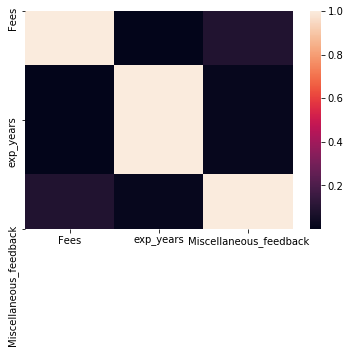

In [17]:
# heat map of corelation
sns.heatmap(df_train.corr())

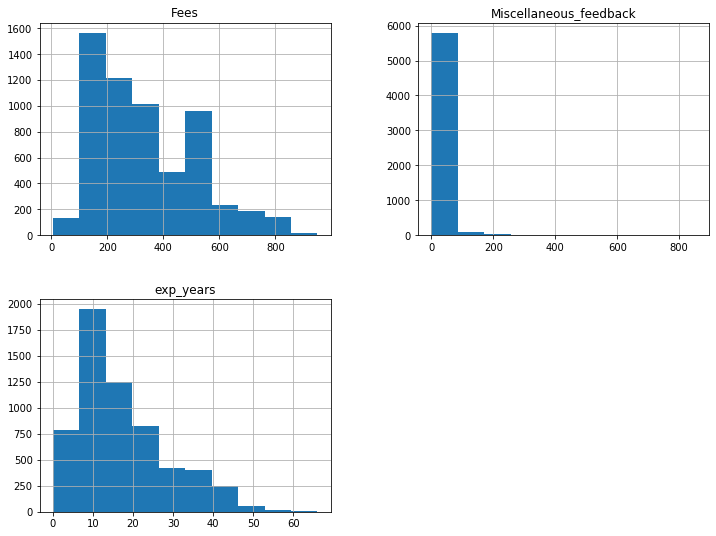

In [18]:
#histogram to check the data despersion

df_train.hist(figsize=(12,9))
plt.show()

Fees                         AxesSubplot(0.125,0.772143;0.227941x0.107857)
exp_years                 AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Miscellaneous_feedback    AxesSubplot(0.672059,0.772143;0.227941x0.107857)
dtype: object

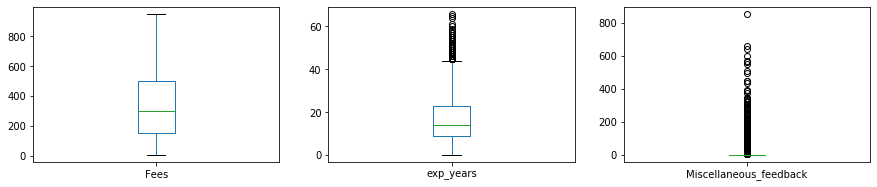

In [19]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
df_train.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

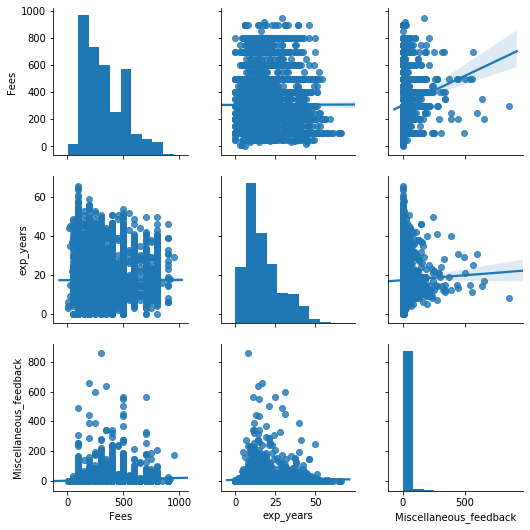

In [20]:
#check the price and travel hour pair plot
sns.pairplot(data=df_train,kind='reg')

###### Manipulating data before bulding the model

In [21]:
#removing outlires 
count_train=df_train[['Fees']]
z=abs(zscore(count_train))
print(df_train.shape)
df_train=df_train.loc[(z<3).all(axis=1)]
print(df_train.shape)

(5961, 9)
(5941, 9)


In [22]:
#masking of object column
categorial_mask1=df_train.dtypes==object
categorial_mask2=df_test.dtypes==object

#categorical columns
categorical_cols1=df_train.columns[categorial_mask1].tolist()
categorical_cols2=df_test.columns[categorial_mask2].tolist()

le=LabelEncoder()

df_train[categorical_cols1]=df_train[categorical_cols1].apply(lambda col:le.fit_transform(col))
df_test[categorical_cols2]=df_test[categorical_cols2].apply(lambda col:le.fit_transform(col))

df_train.head(3)

,Profile,Fees,City,Locality,Qualification_1,Qualification_2,Qualification_3,exp_years,Miscellaneous_feedback
0,5,100,4,296,8,252,406,24,16
1,0,350,0,855,5,241,406,12,76
2,3,300,0,452,78,334,406,9,0


In [23]:
df_test.head(3)

,Profile,City,Locality,Qualification_1,Qualification_2,Qualification_3,exp_years,Miscellaneous_feedback
0,4,6,142,48,243,195,35,0
1,3,5,577,48,79,195,31,0
2,2,1,212,48,28,195,40,4


In [24]:
# dividing dataset into input values 'x' and output value 'y'
x = df_train.drop(columns=['Fees'])
print('x dataset\n',x.head(),'\n')
y=df_train['Fees']
print('y datase\n',y.sample(3))
print(x.shape)
print(y.shape)

x dataset
    Profile  City  Locality  Qualification_1  Qualification_2  Qualification_3  \
0        5     4       296                8              252              406   
1        0     0       855                5              241              406   
2        3     0       452               78              334              406   
3        0     0        68               12                7              406   
4        0     1       335                5              426              406   

   exp_years  Miscellaneous_feedback  
0         24                      16  
1         12                      76  
2          9                       0  
3         12                       0  
4         20                       4   

y datase
 4963    100
3609    700
589     400
Name: Fees, dtype: int64
(5941, 8)
(5941,)


In [25]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe regression model, to find out the best model

In [26]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [27]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [28]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
1,GradientBoostingRegressor,0.253776,41
7,RandomForestRegressor,0.177188,41
4,SGDRegressor,0.118692,84
8,LinearRegression,0.116500,84
0,Ridge,0.116494,84
3,Lasso,0.114216,84
2,ElasticNet,0.100405,84
9,SVR,0.093050,11
6,KNeighborsRegressor,0.092369,38
5,DecisionTreeRegressor,0.000000,84


###### Conclusion
On basis of r2 score GradientBoostingRegressor model is performing the best with maximum r2 score

In [29]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [30]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
1,GradientBoostingRegressor,0.213224,0.029655
7,RandomForestRegressor,0.114806,0.039870
0,Ridge,0.082958,0.012740
8,LinearRegression,0.082957,0.012742
3,Lasso,0.082791,0.011939
4,SGDRegressor,0.082430,0.012913
2,ElasticNet,0.077372,0.008593
9,SVR,0.061616,0.019634
6,KNeighborsRegressor,0.024445,0.042903
5,DecisionTreeRegressor,-0.541528,0.100946


###### Conclusion
On basis of Cross val Acuracy GradientBoostingRegressor model is performing best with maximum cross val score

###### On basis of our compression of r2 , and Cross val score i choose GradientBoostingRegressor model since it performing best on given data

In [31]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=69)
param_grid={'max_depth':[3,4,5],'max_features':['auto','sqrt'],'min_samples_split':[2,3,4],'n_estimators':[200,300,400],
            'min_samples_leaf':[1,2,3]}
mod=GradientBoostingRegressor()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [32]:
grid_result.best_score_

0.23501012899721693

In [33]:
grid_result.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [34]:
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Using test data and predecting price for test data...

In [35]:
X_train = df_train.drop(labels='Fees', axis=1)
y_train = df_train['Fees'].values

X_test = df_test

In [36]:
# standardizes the data in x using standerd scaler technique
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [37]:
#checking shape of train and test data
X_train.shape,y_train.shape,X_test.shape

((5941, 8), (5941,), (1987, 8))

In [38]:
# using best performing model for predecting the price
gbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

gbr.fit(X_train,y_train)

Y_pred = gbr.predict(X_test)


In [39]:
# saving the predection to a csv file.
prediction = pd.DataFrame(Y_pred, columns=['Y_pred']).to_csv('Project 18 Predict A Doctor Consultation Fee.csv')

In [40]:
# saving the model using pickle.
joblib.dump(gbr,'gbr_Project 18 Predict A Doctor Consultation Fee.pkl')

['gbr_Project 18 Predict A Doctor Consultation Fee.pkl']